In [67]:
import numpy as np
from math import ceil,log,log10,sqrt
import matplotlib.pyplot as plt
import pandas as pd
import dill


In [68]:
filename = 'globalsave3.pkl'
# dill.dump_session(filename)
# dill.load_session(filename)

In [69]:
def ETC(horizon,replications,arms_prob,m):

    arm_means = [0]*len(arms_prob)
    arm_pulls = [0]*len(arms_prob)
    optimal_arm = 0

    optimal_arm_pulls_per_round = np.zeros([horizon,replications])
    regret_per_round = np.zeros([horizon,replications])

    gap = arms_prob[0] - arms_prob[1]
    print('Gap is :', gap)
    print('M is :', m)
    
    np.random.seed(1234)

    for r in range(replications):

        #Exploration
        t = 0
        for i in range(len(arms_prob)):
            for j in range(m):
                arm_pulls[i]+=1
                temp = np.random.binomial(1,arms_prob[i])
                arm_means[i] += (temp - arm_means[i])/arm_pulls[i]
                if i == optimal_arm:
                    optimal_arm_pulls_per_round[t,r] += 1
                regret_per_round[t,r] = (arms_prob[optimal_arm] - arms_prob[i])
                t+=1
                
                ''' # Incremental mean update
                    if i == optimal_arm:
                       optimal_arm_pulls_per_round[t] += (1 - optimal_arm_pulls_per_round[t])/(r+1)
                    else:
                        optimal_arm_pulls_per_round[t] += (0 - optimal_arm_pulls_per_round[t])/(r+1)
                    regret_per_round[t] += (arms_prob[optimal_arm] - arms_prob[i] - regret_per_round[t])/(r+1) 
                '''

        #Exploitation
        best_arm = np.argmax(arm_means)
#       print("Best arm in round : ",replications,"is : ",best_arm)
        for h in range(horizon - m*len(arms_prob)):
            arm_pulls[best_arm] += 1
            temp = np.random.binomial(1, arms_prob[best_arm])
            arm_means[best_arm] += (temp - arm_means[best_arm]) /arm_pulls[best_arm]
            if best_arm == optimal_arm:
                optimal_arm_pulls_per_round[t,r] += 1
            regret_per_round[t,r] = (arms_prob[optimal_arm] - arms_prob[best_arm])
            t+=1


    # Calculating Mean and Standard Error for % optimal arm pulls
    optimal_arm_means_stderr = np.zeros([horizon,2])
    optimal_arm_means_stderr[:,0] = np.mean(optimal_arm_pulls_per_round,axis=1)
    optimal_arm_means_stderr[:,1] = (np.std(optimal_arm_pulls_per_round, axis=1)/sqrt(replications))
    optimal_arm_percentage = sum(optimal_arm_means_stderr[:,0])/horizon*100
    optimal_arm_pulls_sum = np.cumsum(optimal_arm_means_stderr[:,0])/horizon*100
    print("Total Optimal arm pulls :",sum(optimal_arm_means_stderr[:,0]),'and percentage is :',optimal_arm_percentage)


    # Calculating Mean and Standard Error for commulative regret
    regret_means_stderr = np.zeros([horizon,2])
    regret_means_stderr[:,0] = np.mean(regret_per_round,axis=1)
    regret_means_stderr[:,1] = (np.std(regret_per_round, axis=1)/sqrt(replications))
    total_regret = sum(regret_means_stderr[:,0])
    regret_per_round_sum = np.cumsum(regret_means_stderr[:,0])
    print("Total Regret :",total_regret)

    theoretical_regret = gap + (4/gap)*(1+log(horizon*gap**2/4))
    print("Theoretical Regret : ",theoretical_regret,"\n")

    return regret_per_round_sum,regret_means_stderr, optimal_arm_pulls_sum,optimal_arm_means_stderr,optimal_arm_percentage,total_regret,theoretical_regret



In [70]:
horizon = 10000
replications = 100
arms_prob = [[0.9, 0.6], [0.9, 0.8], [0.55, 0.45]]
problem = 2
m_len = 5
optimal_arm_pulls_sum = np.zeros([m_len,horizon])
regret_per_round_sum = np.zeros([m_len,horizon])
optimal_arm_means_stderr = np.zeros([m_len,horizon,2])
regret_means_stderr = np.zeros([m_len,horizon,2])
optimal_arm_percentage = np.zeros([m_len])
total_regret = np.zeros([m_len])
theoretical_regret = np.zeros([m_len])



for i in range(m_len):
    gap = arms_prob[problem][0] - arms_prob[problem][1]
    optimal_m = ceil(4*log(horizon*gap**2/4)/gap**2)
    m = [optimal_m,1,100,1000,2000]
    print("Executing problem :",problem,"with arms probability :",arms_prob[problem]," with M = ",m[i])
    regret_per_round_sum[i,:],regret_means_stderr[i,:,:], optimal_arm_pulls_sum[i,:],optimal_arm_means_stderr[i,:,:],optimal_arm_percentage[i],total_regret[i],theoretical_regret[i] = ETC(horizon,replications,arms_prob[problem],m[i])



Executing problem : 2 with arms probability : [0.55, 0.45]  with M =  1288
Gap is : 0.10000000000000003
M is : 1288
Total Optimal arm pulls : 8712.0 and percentage is : 87.12
Total Regret : 128.8
Theoretical Regret :  168.85503299472796 

Executing problem : 2 with arms probability : [0.55, 0.45]  with M =  1
Gap is : 0.10000000000000003
M is : 1
Total Optimal arm pulls : 9899.02 and percentage is : 98.9902
Total Regret : 10.098
Theoretical Regret :  168.85503299472796 

Executing problem : 2 with arms probability : [0.55, 0.45]  with M =  100
Gap is : 0.10000000000000003
M is : 100
Total Optimal arm pulls : 9802.0 and percentage is : 98.02
Total Regret : 19.8
Theoretical Regret :  168.85503299472796 

Executing problem : 2 with arms probability : [0.55, 0.45]  with M =  1000
Gap is : 0.10000000000000003
M is : 1000
Total Optimal arm pulls : 9000.0 and percentage is : 90.0
Total Regret : 100.0
Theoretical Regret :  168.85503299472796 

Executing problem : 2 with arms probability : [0.5

In [71]:
from IPython.display import HTML, display

def tableIt(data):
    print(pd.DataFrame(data))

In [72]:
print("optimal_arm_percentage")
tableIt(optimal_arm_percentage)

print("total_regret")
tableIt(total_regret)

print("theoretical_regret")
tableIt(theoretical_regret)


optimal_arm_percentage
         0
0  87.1200
1  98.9902
2  98.0200
3  90.0000
4  80.0000
total_regret
         0
0  128.800
1   10.098
2   19.800
3  100.000
4  200.000
theoretical_regret
            0
0  168.855033
1  168.855033
2  168.855033
3  168.855033
4  168.855033


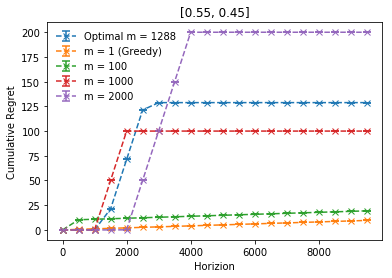

regret_means_stderr
[[  0.00000000e+00   1.38777878e-18   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  9.94987437e-04   9.94987437e-04   9.94987437e-04   9.94987437e-04
    9.94987437e-04]
 [  9.94987437e-04   9.94987437e-04   9.94987437e-04   9.94987437e-04
    9.94987437e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   1.38777878e-18   0.00000000e+00   0.00000000e+00
    0.00000000e+00]]


In [73]:
x = np.arange(horizon)
ind = [i for i in range(0,horizon,500)]

for i in range(m_len):
    plt.errorbar(x[ind],regret_per_round_sum[i,ind], regret_means_stderr[i,ind,1],
            linestyle='--', marker='x',capsize=4,capthick=1.5,elinewidth=1.5)

plt.xlabel('Horizion')
plt.ylabel('Cumulative Regret')
plt.legend(['Optimal m = '+str(optimal_m),'m = 1 (Greedy)','m = 100','m = 1000','m = 2000','Error bars'],loc=0,frameon=False)
plt.title(arms_prob[problem])
# plt.ylim((0,250))
plt.savefig('CumulativeRegret_'+str(problem)+'.png',dpi=300)
plt.show()

print("regret_means_stderr")
print(regret_means_stderr[:,[500,2000,5000,8000,9500],1])

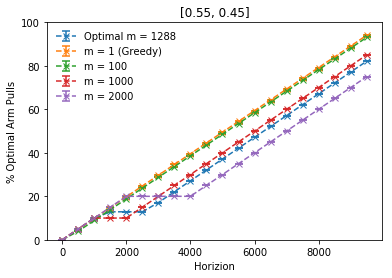

optimal_arm_means_stderr
[[ 0.          0.          0.          0.          0.        ]
 [ 0.00994987  0.00994987  0.00994987  0.00994987  0.00994987]
 [ 0.00994987  0.00994987  0.00994987  0.00994987  0.00994987]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]


In [74]:
for i in range(m_len):
    plt.errorbar(x[ind],optimal_arm_pulls_sum[i,ind], optimal_arm_means_stderr[i,ind,1],
                linestyle='--', marker='x',capsize=4,capthick=1.5,elinewidth=1.5)
plt.xlabel('Horizion')
plt.ylabel('% Optimal Arm Pulls')
plt.legend(['Optimal m = '+str(optimal_m),'m = 1 (Greedy)','m = 100','m = 1000','m = 2000','Error bars'],loc=0,frameon=False)
plt.title(arms_prob[problem])
plt.ylim((0,100))
plt.savefig('OptimalArmPulls_'+str(problem)+'.png',dpi=300)
plt.show()

print("optimal_arm_means_stderr")
print(optimal_arm_means_stderr[:,[500,2000,5000,8000,9500],1])